In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import torch
from tqdm import tqdm
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline
import json

In [ ]:
suhi_combined_file_path = '/content/SUHI_MATRIX_WITH_CHW_Notes_10_29_2024.csv'
suhi_df = pd.read_csv(suhi_combined_file_path)

In [ ]:
excluded_words = ['lvm', 'closed case', 'case closed', 'left a vm', 'no response', 'declined', 'no answer', 'pt unavailable', 'pt', 'patient', 'stated', 'call', 'called', 'phone', 'number']

suhi_df['combined_notes'] = suhi_df[suhi_df.columns[suhi_df.columns.str.contains('notes_contact')]].apply(
    lambda x: '. '.join([note for note in x.dropna().astype(str).str.lower()
                         if len(note.split()) >= 2 and not any(excluded_word in note for excluded_word in excluded_words)]),
    axis=1
)

In [ ]:
# Drop based on null values in combined_notes
suhi_without_null_df = suhi_df.dropna(subset=['combined_notes', 'day_readmit'])

In [ ]:
suhi_without_null_df

,record_id,age,sum_contact_attempts_calc,contact_attempts,day_readmit,total_time_spent,Visit_Number,Count_of_visit,comorbidity,sumComorbidities,...,resources_covid_notes,resources_diabetes_notes,resources_asthma_notes,resources_alc_notes,resources_substance_notes,resources_emotional_notes,sdoh_other_notes,resources_other_notes,sdoh_notes,combined_notes
0,2,66.0,NaN,3.0,0.0,0.0,1,2,1,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
1,2,NaN,NaN,3.0,0.0,21.0,2,2,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
2,4,50.0,NaN,3.0,1.0,21.0,1,1,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
3,5,61.0,NaN,4.0,0.0,50.0,1,2,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,emotional support
4,5,59.0,NaN,3.0,0.0,15.0,2,2,1,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2615,2311,60.0,3.0,3.0,0.0,21.0,1,1,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
2616,2312,35.0,5.0,3.0,0.0,21.0,1,1,1,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
2617,2313,49.0,NaN,3.0,0.0,21.0,1,1,1,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
2618,2314,62.0,NaN,3.0,0.0,21.0,1,1,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,


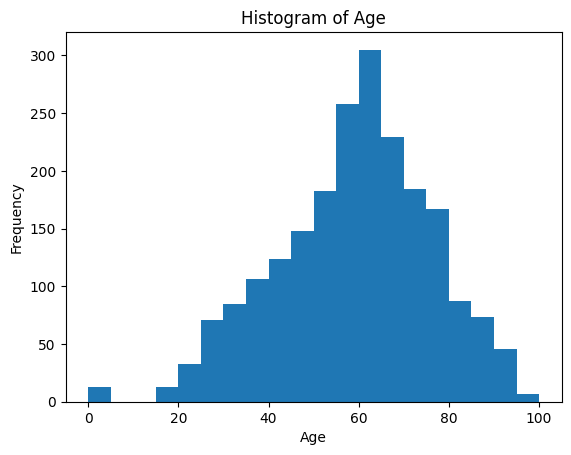

In [ ]:
# Plot a histogram for Age variable
plt.hist(suhi_without_null_df['age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

In [ ]:
pts_less_than_60 = ''
pts_more_than_60 = ''
for index, row in suhi_without_null_df.iterrows():
    if row['age'] < 60:
        pts_less_than_60 += row['combined_notes']
    else:
        pts_more_than_60 += row['combined_notes']

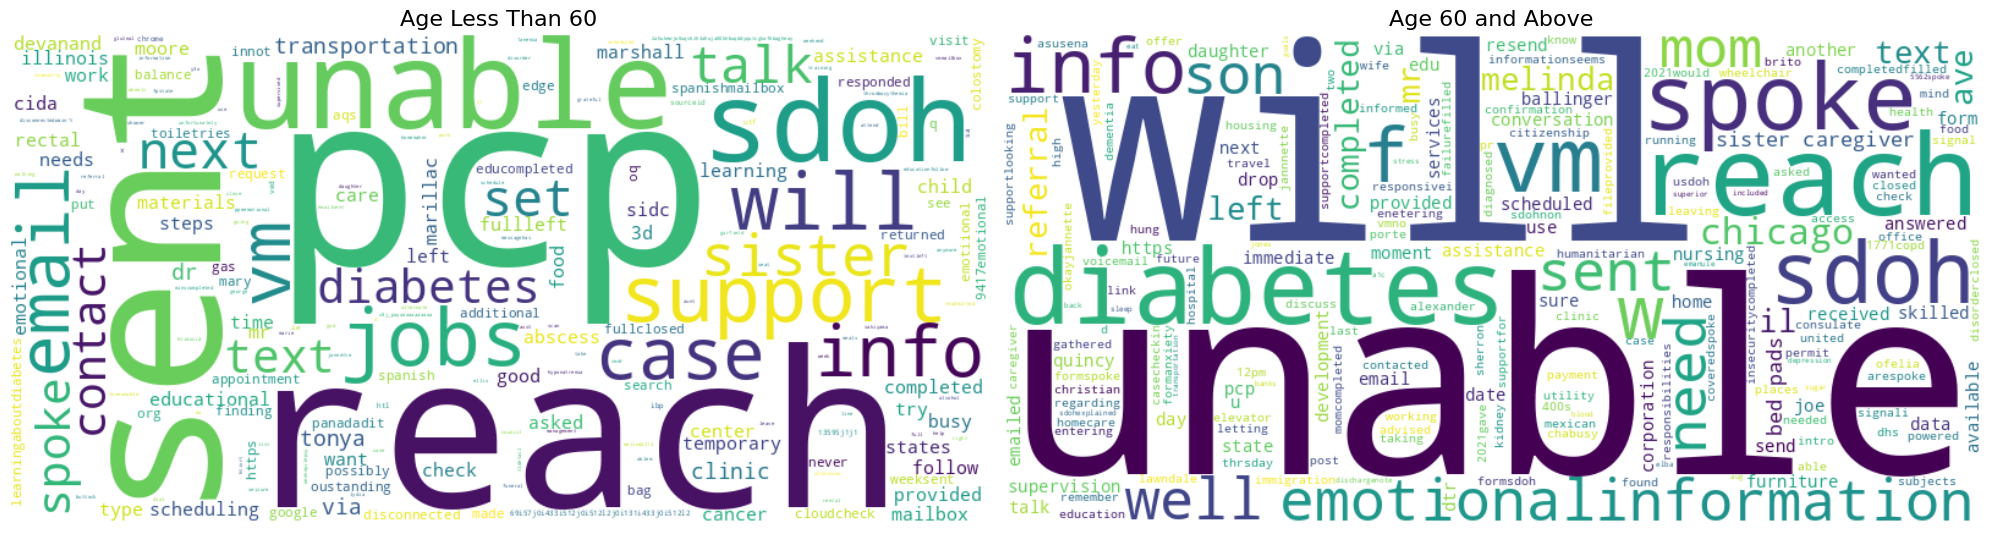

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine text data for each category
text_less_than_60 = pts_less_than_60
text_more_than_60 = pts_more_than_60

# Create word cloud objects for each text
wordcloud_less_than_60 = WordCloud(width=800, height=400, background_color='white').generate(text_less_than_60)
wordcloud_more_than_60 = WordCloud(width=800, height=400, background_color='white').generate(text_more_than_60)

# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Plot the first word cloud
axes[0].imshow(wordcloud_less_than_60, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title("Age Less Than 60", fontsize=16)

# Plot the second word cloud
axes[1].imshow(wordcloud_more_than_60, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title("Age 60 and Above", fontsize=16)

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
# Male and female patients
male_pts = ''
female_pts = ''
for index, row in suhi_without_null_df.iterrows():
    if row['sex_gender_female'] == 0:
        male_pts += row['combined_notes']
    else:
        female_pts += row['combined_notes']

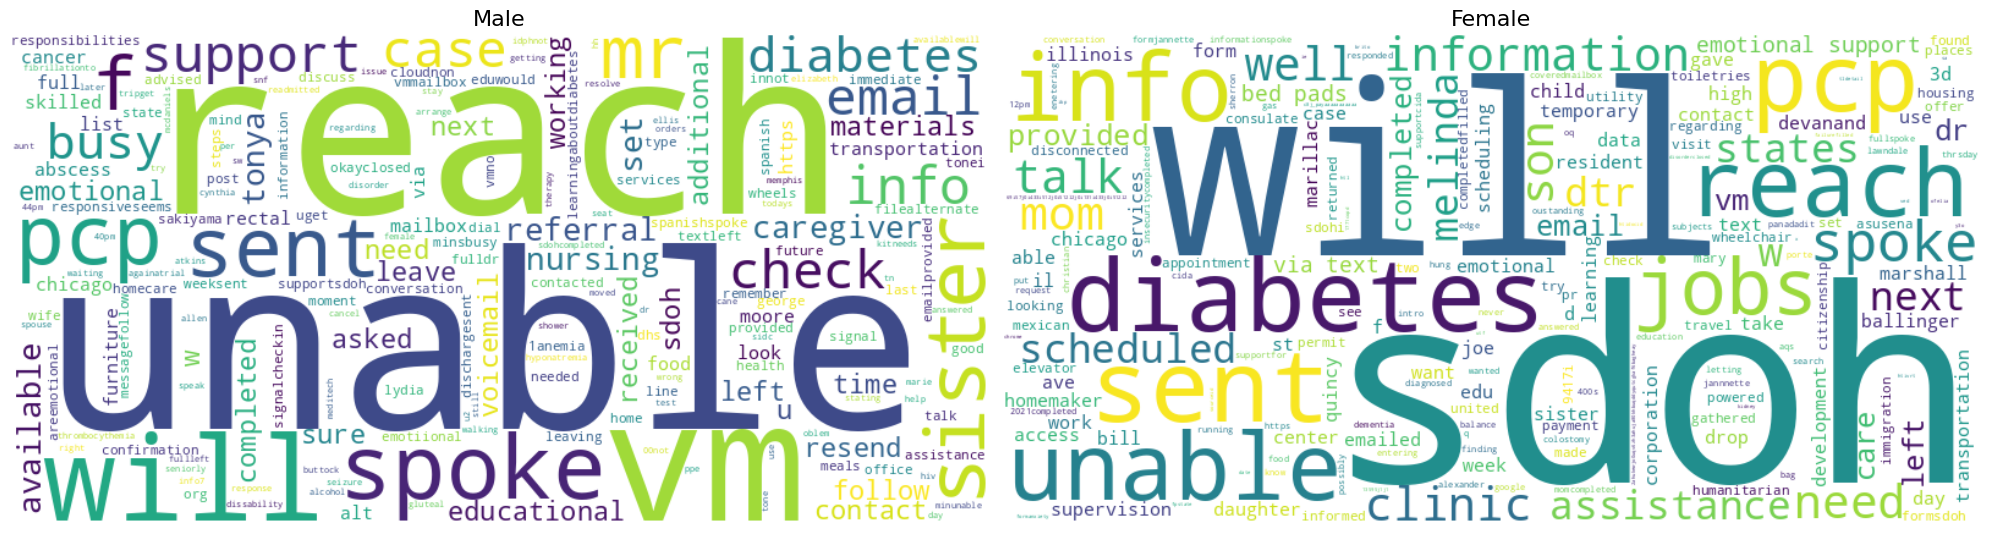

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine text data for each category
text_male_pts = male_pts
text_female_pts = female_pts

# Create word cloud objects for each text
wordcloud_male_pts = WordCloud(width=800, height=400, background_color='white').generate(text_male_pts)
wordcloud_female_pts = WordCloud(width=800, height=400, background_color='white').generate(text_female_pts)

# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Plot the first word cloud
axes[0].imshow(wordcloud_male_pts, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title("Male", fontsize=16)

# Plot the second word cloud
axes[1].imshow(wordcloud_female_pts, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title("Female", fontsize=16)

# Display the plot
plt.tight_layout()
plt.show()

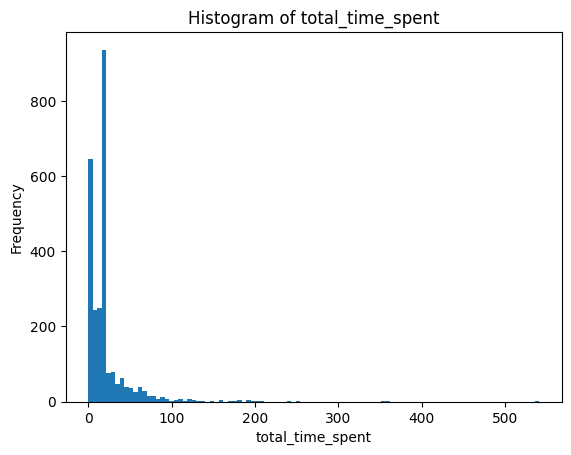

In [ ]:
# # make a distribution plot on total_time_spent
# sns.displot(suhi_without_null_df['total_time_spent'])

# Plot a histogram for Age variable
plt.hist(suhi_without_null_df['total_time_spent'], bins=100)
plt.xlabel('total_time_spent')
plt.ylabel('Frequency')
plt.title('Histogram of total_time_spent')
plt.show()

In [ ]:
# Patients who spoke less than 30 mins
pts_less_than_30_mins = ''
# Patients who spoke more than 30 mins
pts_more_than_30_mins = ''
for index, row in suhi_without_null_df.iterrows():
    if row['total_time_spent'] < 30:
        pts_less_than_30_mins += row['combined_notes']
    else:
        pts_more_than_30_mins += row['combined_notes']

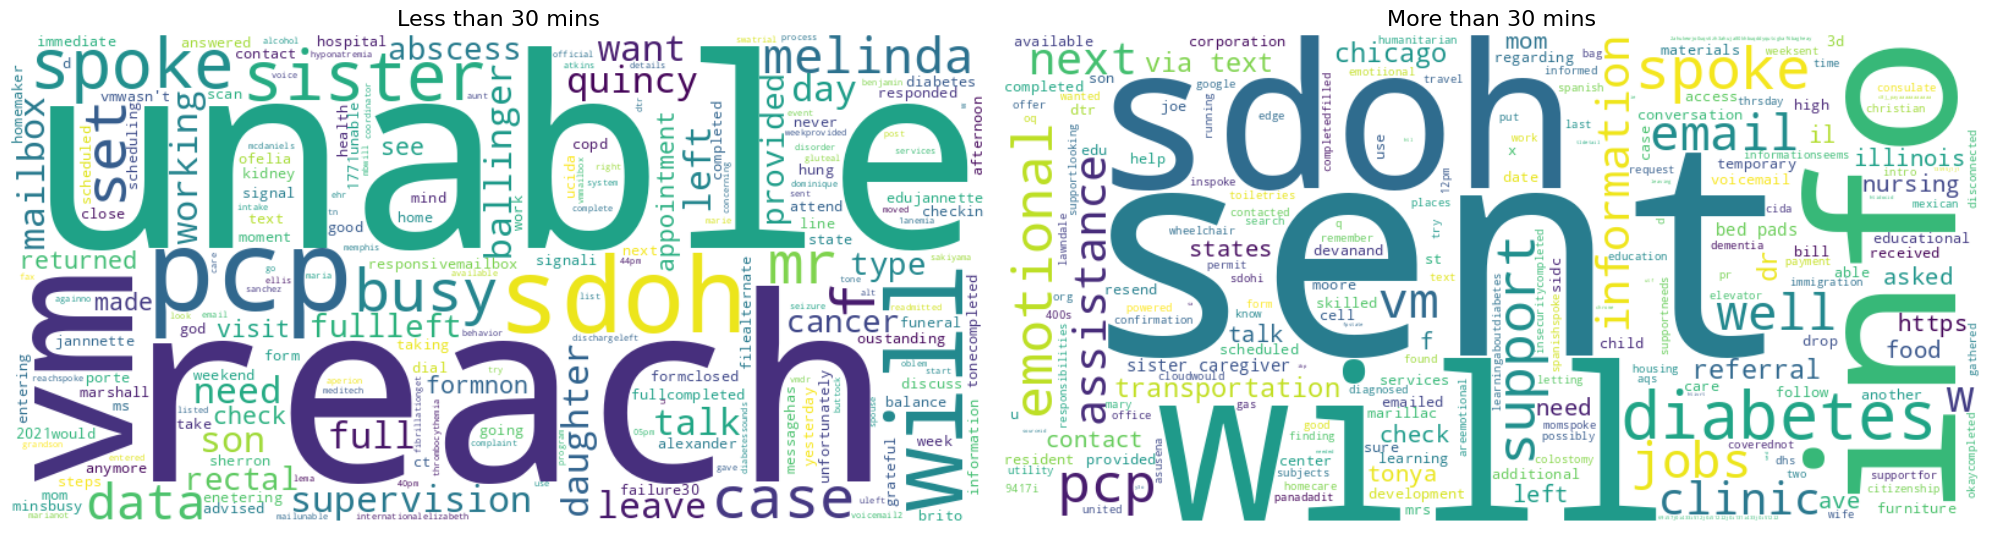

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine text data for each category
text_male_pts = pts_less_than_30_mins
text_female_pts = pts_more_than_30_mins

# Create word cloud objects for each text
wordcloud_male_pts = WordCloud(width=800, height=400, background_color='white').generate(text_male_pts)
wordcloud_female_pts = WordCloud(width=800, height=400, background_color='white').generate(text_female_pts)

# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Plot the first word cloud
axes[0].imshow(wordcloud_male_pts, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title("Less than 30 mins", fontsize=16)

# Plot the second word cloud
axes[1].imshow(wordcloud_female_pts, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title("More than 30 mins", fontsize=16)

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
# spoke with patient or not
pts_spoke_yes = ''
pts_spoke_no  = ''
for index, row in suhi_without_null_df.iterrows():
    if row['spoke_patient_yes'] == 1:
        pts_spoke_yes += row['combined_notes']
    else:
        pts_spoke_no += row['combined_notes']

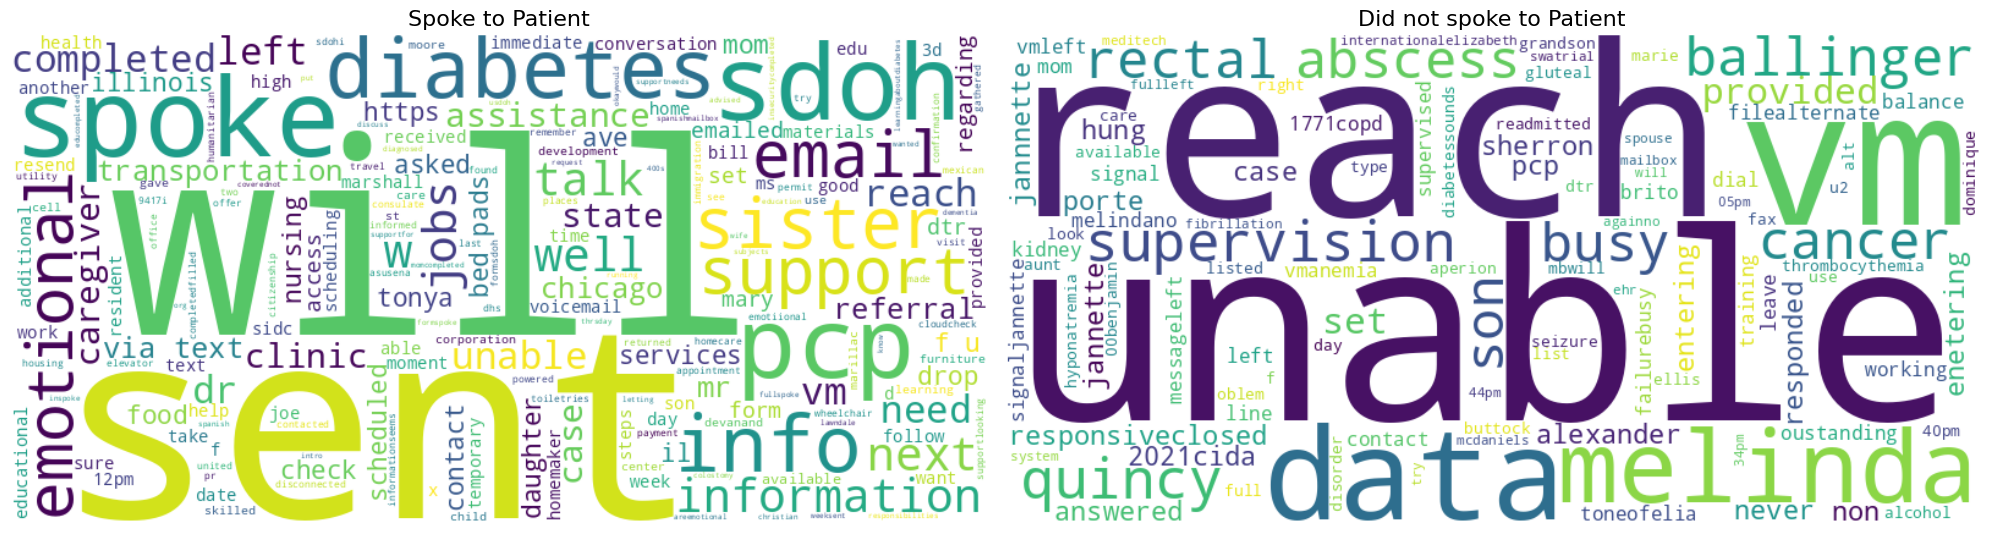

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine text data for each category
text_male_pts = pts_spoke_yes
text_female_pts = pts_spoke_no

# Create word cloud objects for each text
wordcloud_male_pts = WordCloud(width=800, height=400, background_color='white').generate(text_male_pts)
wordcloud_female_pts = WordCloud(width=800, height=400, background_color='white').generate(text_female_pts)

# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Plot the first word cloud
axes[0].imshow(wordcloud_male_pts, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title("Spoke to Patient", fontsize=16)

# Plot the second word cloud
axes[1].imshow(wordcloud_female_pts, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title("Did not spoke to Patient", fontsize=16)

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
# patient readmitted or not
pts_readmitted = ''
pts_not_readmitted  = ''
for index, row in suhi_without_null_df.iterrows():
    if row['day_readmit'] == 1:
        pts_readmitted += row['combined_notes']
    else:
        pts_not_readmitted += row['combined_notes']

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine text data for each category
text_male_pts = pts_readmitted
text_female_pts = pts_not_readmitted

# Create word cloud objects for each text
wordcloud_male_pts = WordCloud(width=800, height=400, background_color='white').generate(text_male_pts)
wordcloud_female_pts = WordCloud(width=800, height=400, background_color='white').generate(text_female_pts)

# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Plot the first word cloud
axes[0].imshow(wordcloud_male_pts, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title("Readmitted Patient", fontsize=16)

# Plot the second word cloud
axes[1].imshow(wordcloud_female_pts, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title("Not readmitted Patient", fontsize=16)

# Display the plot
plt.tight_layout()
plt.show()